In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print("Downloading MNIST (this may take a while)...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X.astype(np.float32) / 255.0
y = y.astype(int)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Train samples: 56000, Test samples: 14000


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
depths = {
    "1-layer": (10,),
    "5-layer": tuple([10]*5),
    "10-layer": tuple([10]*10),
    "20-layer": tuple([10]*20)
}
max_iter = 30
learning_rate_init = 0.001
random_state = 42

results = {}


In [ ]:
for name, hidden in depths.items():
    print(f"\nTraining: {name} with hidden_layer_sizes={hidden}")
    mlp = MLPClassifier(hidden_layer_sizes=hidden,
                        activation='relu',
                        solver='adam',
                        learning_rate_init=learning_rate_init,
                        max_iter=max_iter,
                        batch_size=128,
                        random_state=random_state,
                        verbose=False)
    start = time.time()
    mlp.fit(X_train, y_train)
    duration = time.time() - start


    loss_curve = mlp.loss_curve_ if hasattr(mlp, "loss_curve_") else []

    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Time: {duration:.1f}s | train_acc: {train_acc:.4f} | test_acc: {test_acc:.4f} | loss len: {len(loss_curve)}")

    results[name] = {
        "hidden": hidden,
        "model": mlp,
        "time": duration,
        "loss_curve": loss_curve,
        "train_acc": train_acc,
        "test_acc": test_acc
    }



Training: 1-layer with hidden_layer_sizes=(10,)
Time: 13.4s | train_acc: 0.9584 | test_acc: 0.9292 | loss len: 30

Training: 5-layer with hidden_layer_sizes=(10, 10, 10, 10, 10)
Time: 24.6s | train_acc: 0.9547 | test_acc: 0.9294 | loss len: 30

Training: 10-layer with hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
Time: 39.5s | train_acc: 0.9301 | test_acc: 0.9060 | loss len: 30

Training: 20-layer with hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
Time: 66.2s | train_acc: 0.8409 | test_acc: 0.8316 | loss len: 30


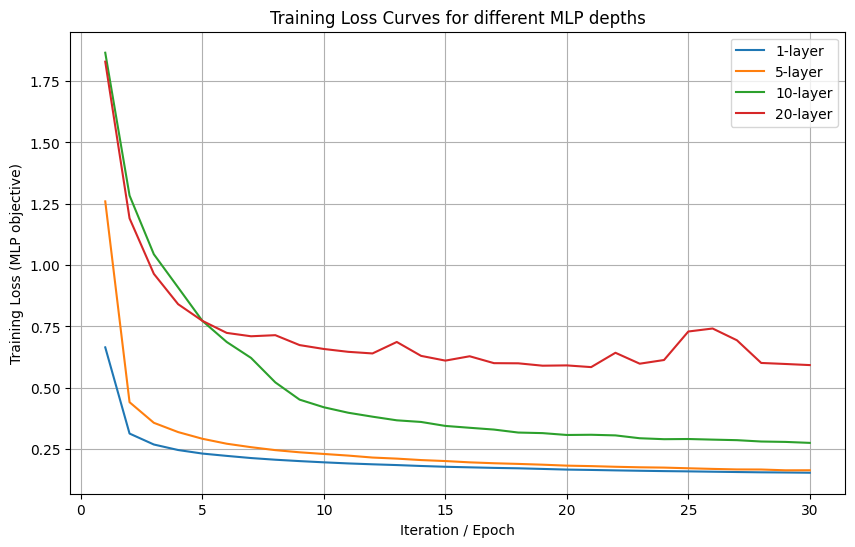

In [ ]:

plt.figure(figsize=(10,6))
for name, r in results.items():
    lc = r["loss_curve"]
    if len(lc) == 0:
        continue
    plt.plot(np.arange(1, len(lc)+1), lc, label=name)
plt.xlabel("Iteration / Epoch")
plt.ylabel("Training Loss (MLP objective)")
plt.title("Training Loss Curves for different MLP depths")
plt.legend()
plt.grid(True)
plt.show()


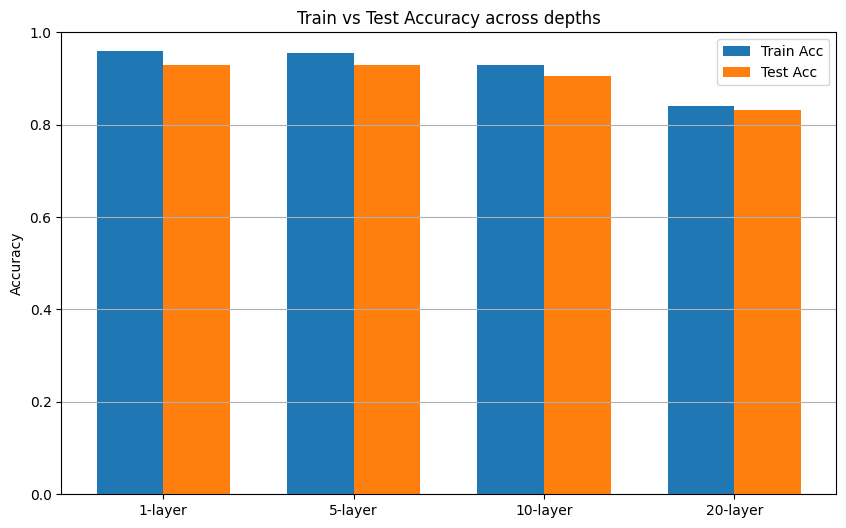

In [ ]:

names = list(results.keys())
train_accs = [results[n]["train_acc"] for n in names]
test_accs  = [results[n]["test_acc"]  for n in names]
x = np.arange(len(names))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, train_accs, width, label='Train Acc')
plt.bar(x + width/2, test_accs, width, label='Test Acc')
plt.xticks(x, names)
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy across depths")
plt.legend()
plt.grid(axis='y')
plt.show()


In [ ]:
print("\nSummary:")
print(f"{'Config':<12} {'Time(s)':>8} {'#loss':>6} {'TrainAcc':>9} {'TestAcc':>9}")
for name, r in results.items():
    print(f"{name:<12} {r['time']:8.1f} {len(r['loss_curve']):6d} {r['train_acc']:9.4f} {r['test_acc']:9.4f}")


Summary:
Config        Time(s)  #loss  TrainAcc   TestAcc
1-layer          14.8     30    0.9584    0.9292
5-layer          28.2     30    0.9547    0.9294
10-layer         44.8     30    0.9301    0.9060
20-layer         82.8     30    0.8409    0.8316
